In [1]:
metafile="J1640+2224_C.meta"
#metafile = "clfd.meta"
import ppalign as ppa
import numpy as np




In [2]:
outfile = "abc.port"
ppa.align_archives(metafile=metafile, initial_guess="300_coherent_GWB/J1640+2224_500_200_512_2.10feb2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM",
                   tscrunch=True, pscrunch=True, SNR_cutoff=0.0, outfile=outfile, niter=1, quiet=False)

# Initial guess is an initial guess for an average portrait. I used the highest SNR profile for this.
# In this case, J1646-2142f64avgport.port is the average portrait created from the data files listed in the
# metafile. "f64" denotes that the files have been scrunched to have 64 frequency channels

# It is important to note that bad channels zeroed in the GMRT data processing pipeline must be fully zapped
# before being run through this notebook. I created a very simple shell script to do this and f scrunch to 
# a given number of frequency channels. I have only had total functionality with 64 channels. Input files also
# must be in FITS format. The shell script requires PSRCHIVE tools to work.




Initial guess: 300_coherent_GWB/J1640+2224_500_200_512_2.10feb2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM.

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.10feb2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity

Doing iteration 1...
FITS file name: 300_coherent_GWB/J1640+2224_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM.

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        

In [3]:
import ppspline as pps
avgport = outfile
dp = pps.DataPortrait(avgport)
dp.normalize_portrait("prof")

# This initializes the portrait be modeled by the spline model later. It is normalized 
# by the average portrait created earlier, so as to clearly model any frequency-dependent
# profile evolution.



Reading data from abc.port on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 0.000000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity



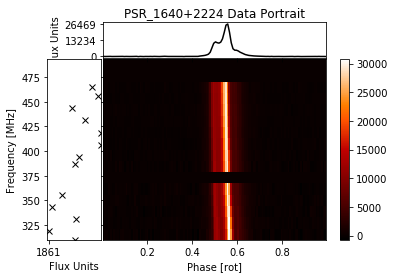

In [5]:
dp.show_data_portrait()

In [6]:
# Mainly set to defaults. SNR cutoffs removed
smooth = True
rchi2_tol = 0.1 #What is this factor
k = 5
sfac = 1.0
max_nbreak = 2

# Setting default arguments for the make_spline_model() seen below. It is important to set
# max_nbreak = None. Otherwise, the spline model will have many breakpoints and not accurately
# model the profile evolution.
dp.make_spline_model(smooth=smooth, rchi2_tol=rchi2_tol, k=k, sfac=sfac,
                    max_nbreak=max_nbreak, model_name=None, quiet=False, snr_cutoff=15.0)
# Creation of spline model. snr_cutoff is default to 150 but tweaking may be needed to
# get 1 - 2 "significant" eigenprofiles. Somewhat arbitrary.


Performing principal component analysis on data with 128 dimensions and 13 measurements...
B-spline interpolation model abc.port.spl uses 3 basis profile components and 2 breakpoints (6 B-splines with k=5).


/home/jroy/anaconda2/lib/python2.7/site-packages/scipy/interpolate/_fitpack_impl.py:296: RuntimeWarning: The spline is weighted least-squares polynomial of degree k.
fp gives the upper bound fp0 for the smoothing factor s	k=5 n=12 m=13 fp=3746.380195 s=26934.486359
  (k, len(t), m, fp, s)))


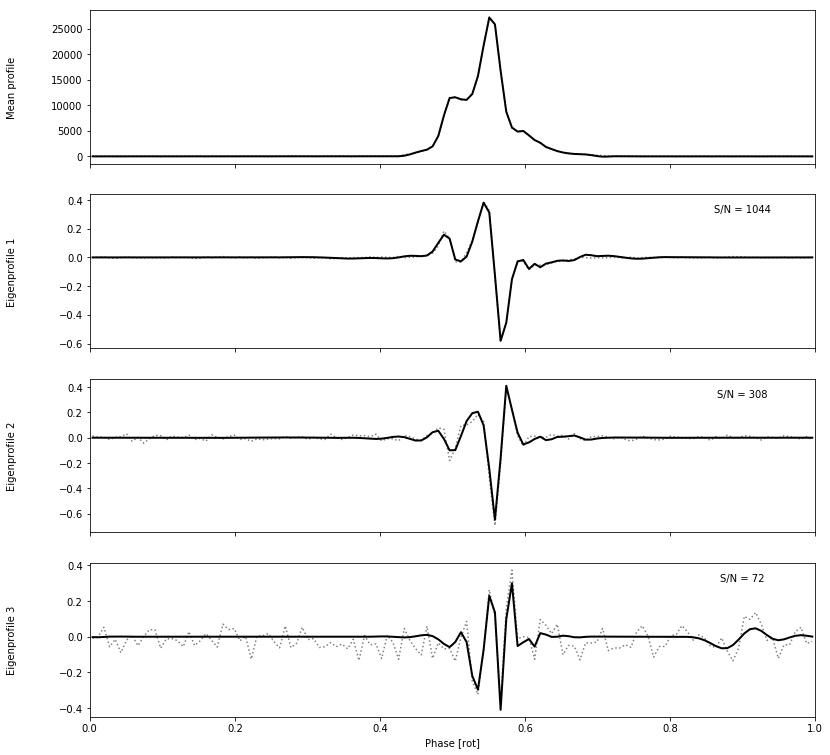

In [8]:
dp.show_eigenprofiles(show_snrs=True)
# Showing average profile and eigenprofile(s)


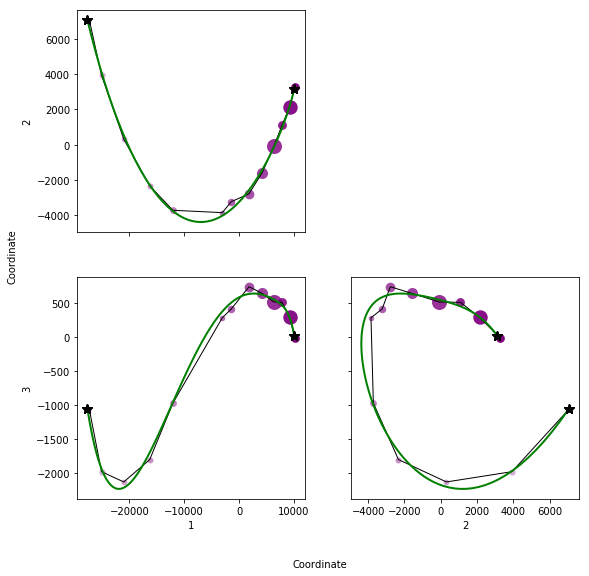

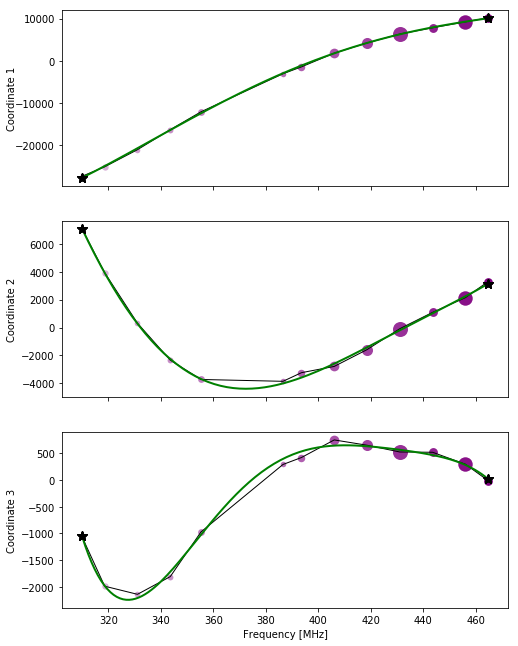

In [7]:
dp.show_spline_curve_projections()
# Shows a projection of how the eigenprofile(s) changes according to frequency and to each other.


In [8]:
J1640_fit_modelfile = "J1640+2224_splinefit.spl"
dp.write_model(J1640_fit_modelfile, quiet=False)

# Writes spline model to a file.


Wrote modelfile J1640+2224_splinefit.spl.



Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1198.82 s
Reading model from J1640+2224_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1640+2224_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM
~0.0155 sec/TOA
Med. TOA error is 0.421 us

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz

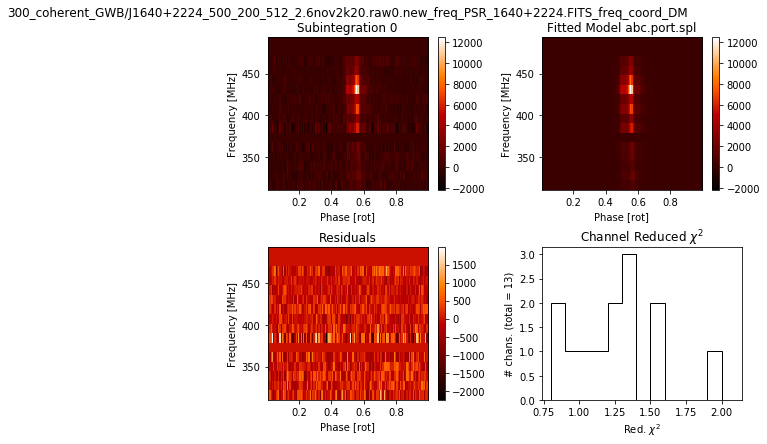


Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.5dec2k20.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1640+2224_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1640+2224_500_200_512_2.5dec2k20.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM
~0.0152 sec/TOA
Med. TOA error is 0.079 us

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.5dec2k20.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz

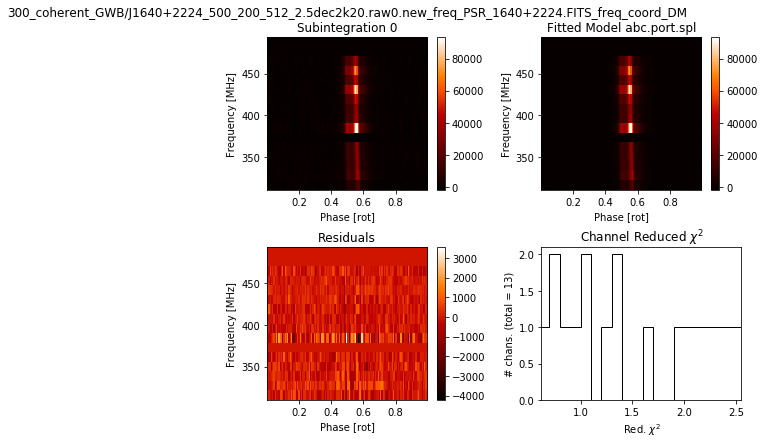


Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.4jan2k21.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1640+2224_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1640+2224_500_200_512_2.4jan2k21.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM
~0.0124 sec/TOA
Med. TOA error is 0.143 us

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.4jan2k21.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz

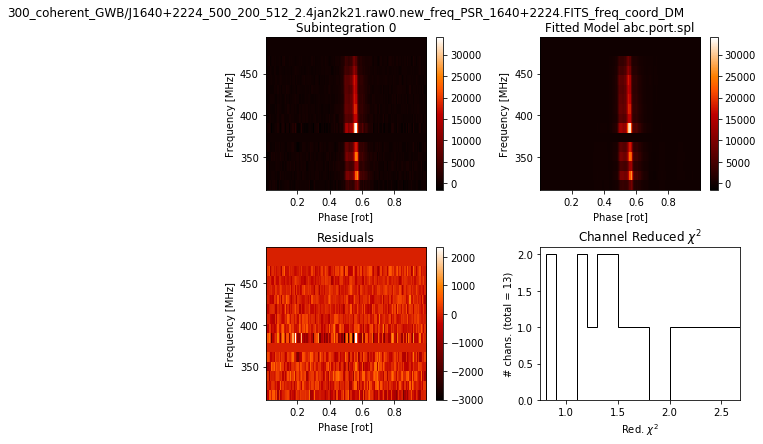


Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.10feb2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1640+2224_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1640+2224_500_200_512_2.10feb2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM
~0.0158 sec/TOA
Med. TOA error is 0.192 us

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.10feb2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        ce

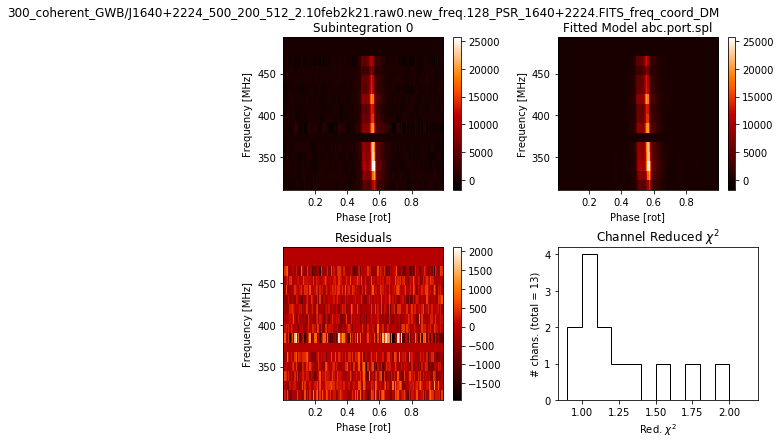


Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.22mar2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1640+2224_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1640+2224_500_200_512_2.22mar2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM
~0.0122 sec/TOA
Med. TOA error is 0.082 us

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.22mar2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        ce

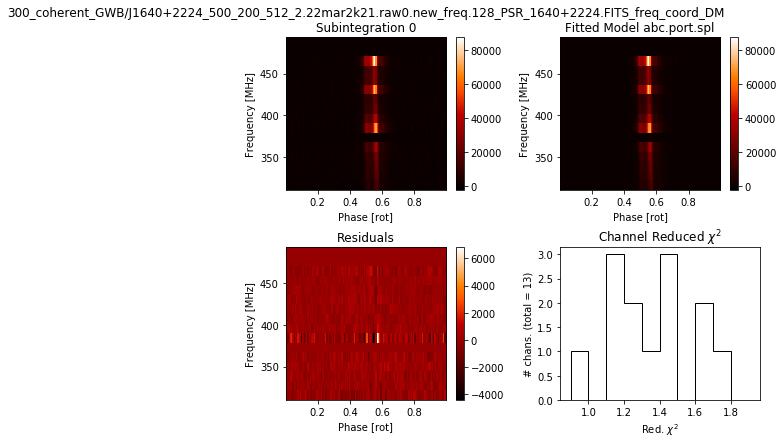


Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.22may2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1640+2224_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1640+2224_500_200_512_2.22may2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM
~0.0106 sec/TOA
Med. TOA error is 0.157 us

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.22may2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        ce

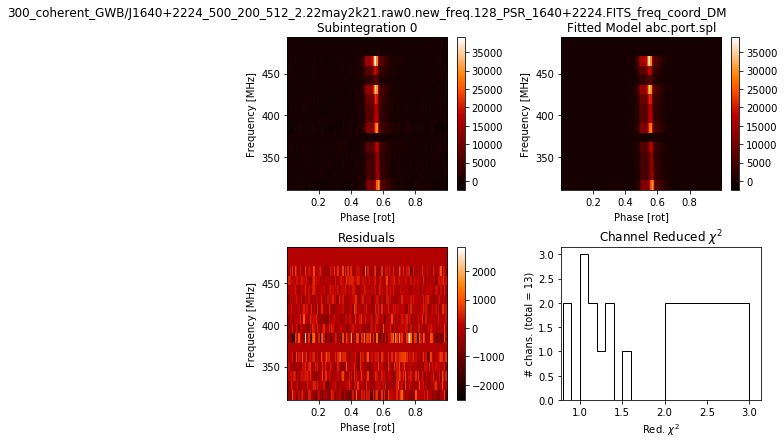


Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1640+2224_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1640+2224_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM
~0.0146 sec/TOA
Med. TOA error is 0.154 us

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        ce

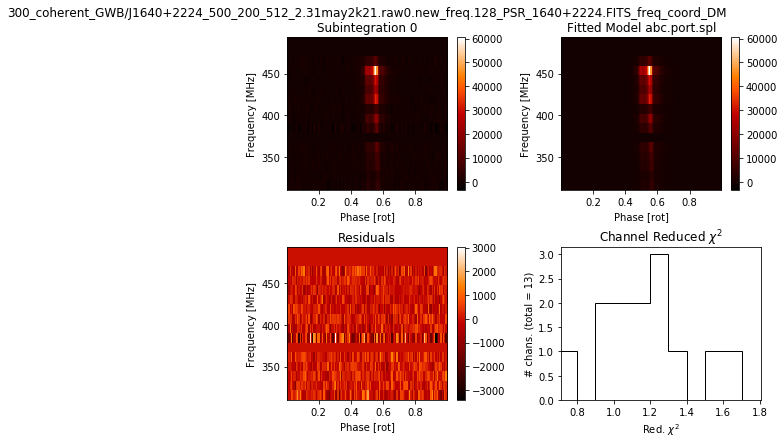


Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1640+2224_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1640+2224_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM
~0.0128 sec/TOA
Med. TOA error is 0.118 us

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        ce

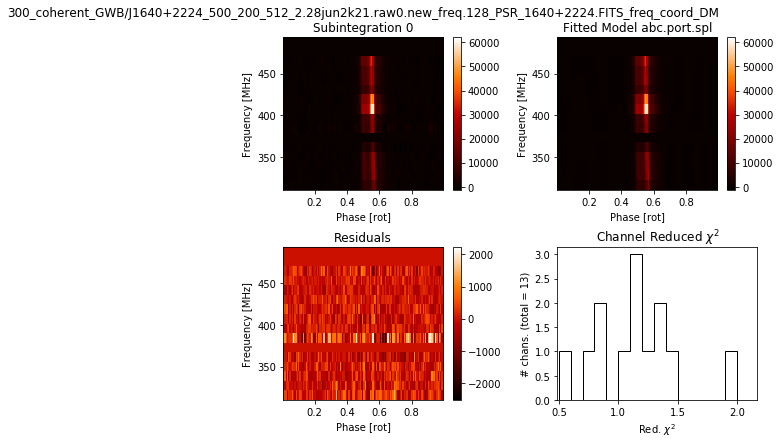


Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1640+2224_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1640+2224_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM
~0.0118 sec/TOA
Med. TOA error is 0.245 us

Reading data from 300_coherent_GWB/J1640+2224_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1640+2224.FITS_freq_coord_DM on source PSR_1640+2224...
	P [ms]             = 3.163
        DM [cm**-3 pc]     = 18.427011
        cente

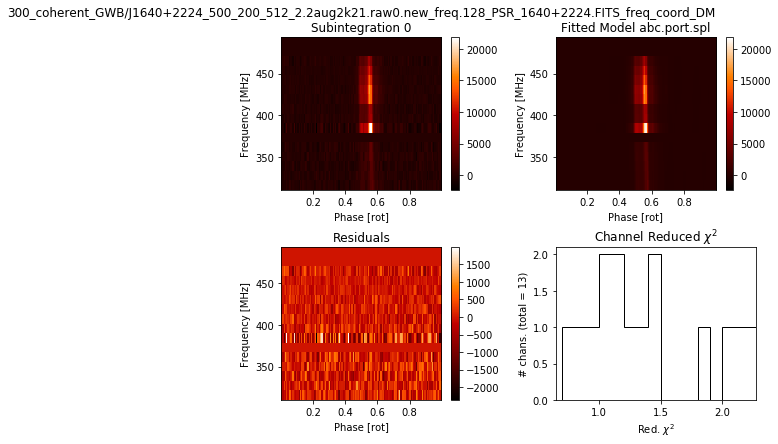

--------------------------
Total time: 0.28 sec, ~0.0316 sec/TOA


In [9]:
import pptoas as ppt
from pplib import write_TOAs
toaprogmeta = "J1640+2224_C.meta"
#toaprogmeta = "clfd.meta"
gt = ppt.GetTOAs(toaprogmeta, J1640_fit_modelfile)
gt.get_TOAs(show_plot=True, bary = True)
#gt.get_narrowband_TOAs()

In [12]:
# TOAs produced. Can see number of TOAs produced per epoch as well as median TOA error for
# each epoch.
#gt.show_fit(datafile=None, isub=0)  # datafile=None will just select the first datafile from the metafile

#timfile = "16Sep2k21_WB_C_J1640+2224_2eig_16fX1t.tim"
#timfile='clfd.tim'
timfile='25Dec2k21_WB_C_J1640+2224_1eig.tim'
#timfile='25Dec2k21_NB_C_J1640+2224.tim'
write_TOAs(gt.TOA_list, SNR_cutoff=0.0, outfile=timfile, append=False)


In [13]:
#fil = open('16Sep2k21_WB_C_J1640+2224_2eig_16fX1t.tim', 'r')
fil = open('25Dec2k21_WB_C_J1640+2224_1eig.tim', 'r')
for line in fil:
    print line#.split()[2], line.split()[3], line.split()[4], line.split()[5], line.split()[6], line.split()[7], line.split()[8]

300_coherent_GWB/J1640+2224_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM 426.34280172 59159.347163626352469   0.421  gmrt -pp_dm 18.4262702 -pp_dme 0.0001681 -be  -nchx 13 -tobs 1198.817 -f _ -gof 1.211 -snr 164.842 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500 -fe  -nbin 128 -tmplt J1640+2224_splinefit.spl

300_coherent_GWB/J1640+2224_500_200_512_2.5dec2k20.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM 406.22007847 59188.229230561130925   0.079  gmrt -pp_dm 18.4272948 -pp_dme 0.0000128 -be  -nchx 13 -tobs 1798.963 -f _ -gof 1.184 -snr 867.802 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500 -fe  -nbin 128 -tmplt J1640+2224_splinefit.spl

300_coherent_GWB/J1640+2224_500_200_512_2.4jan2k21.raw0.new_freq_PSR_1640+2224.FITS_freq_coord_DM 394.67303423 59218.153668878016703   0.143  gmrt -pp_dm 18.4258354 -pp_dme 0.0000204 -be  -nchx 13 -tobs 1798.963 -f _ -gof 1.368 -snr 479.954 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500 -fe  -nbin